In [1]:
import os
import os.path as op
import json
import cv2
import numpy as np
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

In [2]:
orig_root = '../../../../datasets/coco_caption'
img_root = '/media/stopmosk/data/coco_2014/images'
gen_root = '../../../../output'
gen_filename = 'pred.coco_caption.val.beam1.max20.odlabels_coco_format.json'

gen_fullpath = op.join(gen_root, 'scst', 'checkpoint-22-628000', gen_filename)

In [3]:
with open(gen_fullpath) as fp:
    res_json = json.load(fp)

res_dict = {int(s['image_id']): s['caption'] for s in res_json}
res_dict[184613]

'a young boy holding an umbrella and a herd of animals.'


GENERATED CAP: a young boy holding an umbrella and a herd of animals.


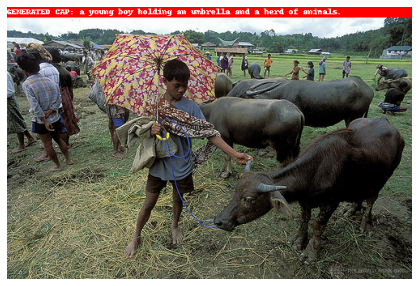

In [5]:
def show_res(sample_idx):
    im_filename = 'COCO_val2014_' + '0' * (12 - len(str(sample_idx))) + str(sample_idx) + '.jpg'
    im_fullpath = os.path.join(img_root, 'val2014', im_filename)
    im = Image.open(im_fullpath)
    # im = im.resize((im.width//2, im.height//2))

    plt.figure(figsize=(8,5))
    draw = ImageDraw.Draw(im)

    text_cap = f"GENERATED CAP: {res_dict[sample_idx]}"
    print('\n' + text_cap)

    max_str_len = im.width // 6  # max string length in letters
    strings_num = len(text_cap) // max_str_len + 1

    b_text = [0, 0, im.width, 12 * strings_num]
    draw.rectangle(b_text, fill=255)

    text_cap_chunks = [text_cap[seek: seek + max_str_len] for seek in range(0, len(text_cap), max_str_len)]
    for i, chunk in enumerate(text_cap_chunks):
        draw.text((0, i * 12), chunk, stroke_width=40, stroke_fill=255)

    plt.axis('off')

    plt.imshow(im);
    plt.savefig('coco_out/' + str(sample_idx) + '.png', bbox_inches='tight')

sample_idx = 184613

for sample_idx in list(res_dict.keys())[:1]:
    show_res(sample_idx)